In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120

In [80]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
data = pd.read_csv('few-shot-results.csv')

In [37]:
zoo_results = data[(data['type']=='zoo') & (data['Augmentation'] != 'No')]

In [38]:
zoo_results_no_finetune = zoo_results[(zoo_results['finetune']=='No') & (zoo_results['support'] < 20)]
zoo_results_finetune = zoo_results[(zoo_results['finetune']=='Yes') & (zoo_results['support'] < 20)]

In [39]:
r = zoo_results_no_finetune.sort_values(by='support')

In [40]:
r2 = zoo_results_finetune.sort_values(by='support')
r2

,type,support,finetune,Augmentation,accuracy,top-3,top-5,epochs,lr
10,zoo,1,Yes,NaN,0.4385,0.5717,0.7025,NaN,NaN
12,zoo,2,Yes,NaN,0.5818,0.7760,0.8696,NaN,NaN
4,zoo,3,Yes,NaN,0.7762,0.9000,0.9433,NaN,NaN
2,zoo,5,Yes,NaN,0.8518,0.9284,0.9545,60.0,0.0001
6,zoo,7,Yes,NaN,0.9313,0.9777,0.9885,NaN,NaN
8,zoo,9,Yes,NaN,0.9538,0.9850,0.9922,NaN,NaN


In [104]:
m = r[['accuracy', 'top-3', 'top-5']].values
f = r2[['accuracy', 'top-3', 'top-5']].values

100*(f-m)/m

array([[ -7.54991461, -17.3545356 , -10.70724943],
       [ 26.01864894,   6.70817651,   1.47379722],
       [ 39.88862256,  11.14541525,   5.16751212],
       [ 33.46913193,  15.04337051,   8.10963869],
       [ 35.95620438,  10.24101853,   4.12114329],
       [ 40.24325691,   9.85946911,   4.80794014]])

In [205]:
np.mean((100*(f-m)/m)[1:,0])

35.11517294552102

Text(0, 0.5, 'Accuracy')

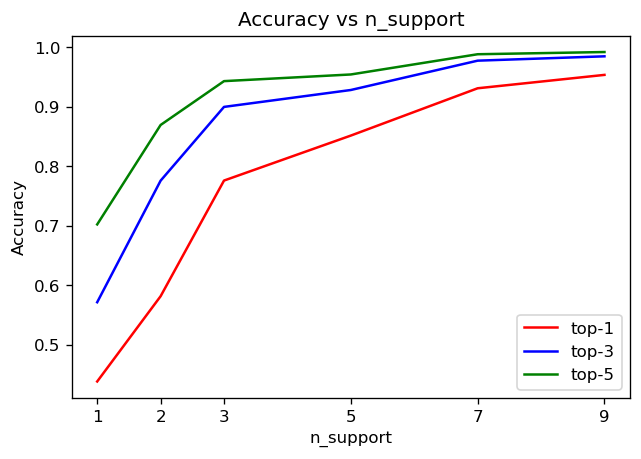

In [82]:
# plt.figure(figsize=(8,8))
plt.plot(r2['support'], r2['accuracy'], 'r',label='top-1')
plt.plot(r2['support'], r2['top-3'], 'b',label='top-3')
plt.plot(r2['support'], r2['top-5'], 'g',label='top-5')
plt.xticks(r2['support'])
plt.legend()
plt.title('Accuracy vs n_support')
plt.xlabel('n_support')
plt.ylabel('Accuracy')

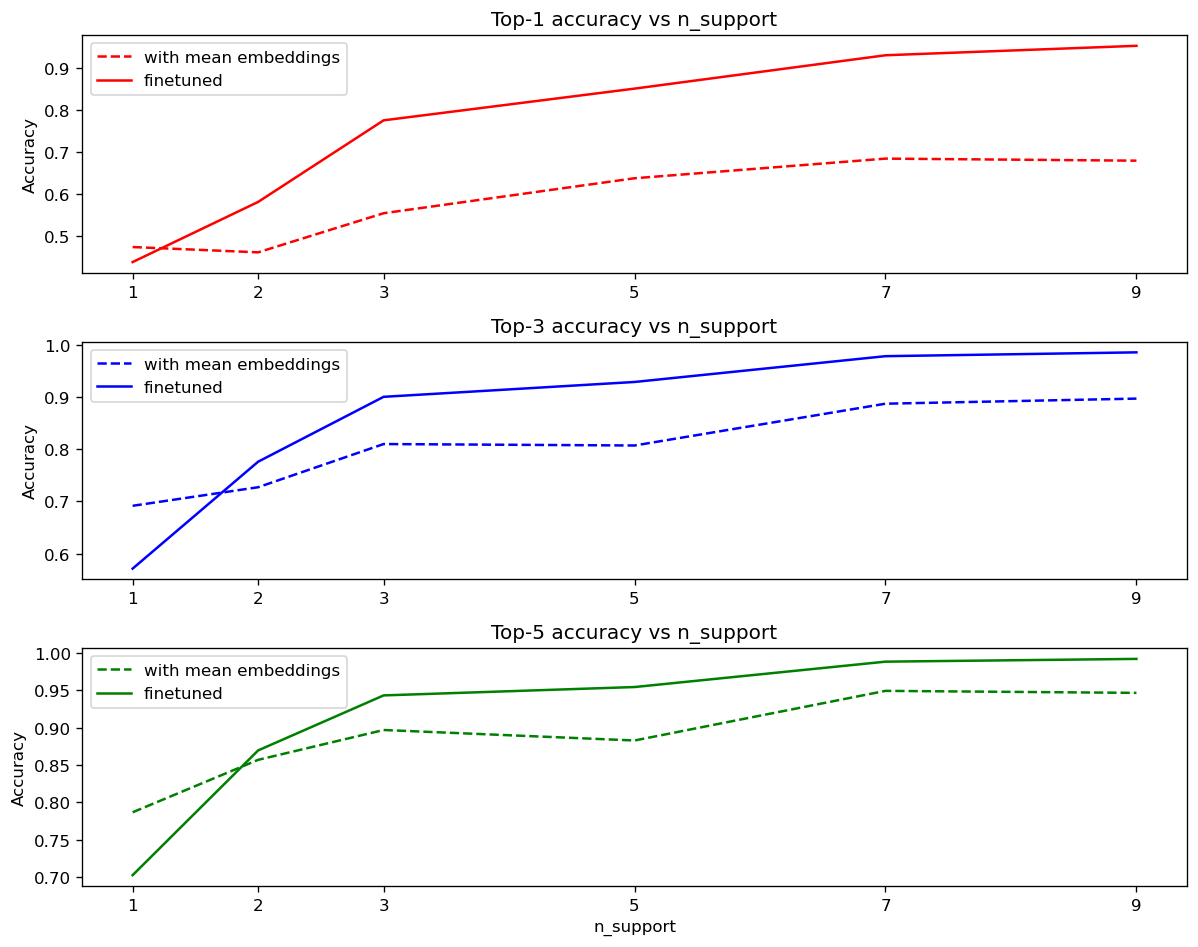

In [87]:
fig, axes = plt.subplots(nrows=3, figsize=(10,8))
axes[0].plot(r['support'], r['accuracy'], 'r--', label='with mean embeddings')
axes[0].plot(r2['support'], r2['accuracy'], 'r',label='finetuned')

axes[1].plot(r['support'], r['top-3'], 'b--', label='with mean embeddings')
axes[1].plot(r2['support'], r2['top-3'], 'b',label='finetuned')

axes[2].plot(r['support'], r['top-5'], 'g--', label='with mean embeddings')
axes[2].plot(r2['support'], r2['top-5'], 'g',label='finetuned')
axes[0].set_xticks(r2['support'])
axes[1].set_xticks(r2['support'])
axes[2].set_xticks(r2['support'])

axes[0].legend()
axes[1].legend()
axes[2].legend()

axes[0].set_title('Top-1 accuracy vs n_support')
axes[2].set_xlabel('n_support')
axes[0].set_ylabel('Accuracy')
axes[1].set_title('Top-3 accuracy vs n_support')
axes[1].set_ylabel('Accuracy')
axes[2].set_title('Top-5 accuracy vs n_support')
axes[2].set_ylabel('Accuracy')
fig.tight_layout()

In [43]:
wild_results = data[(data['type']=='wild') & (data['Augmentation'] != 'No')]

In [44]:
wild_results_no_finetune = wild_results[(wild_results['finetune']=='No') & (wild_results['support'] < 20)]
wild_results_finetune = wild_results[(wild_results['finetune']=='Yes') & (wild_results['support'] < 20)]

In [45]:
r_wild = wild_results_no_finetune.sort_values(by='support')

In [46]:
r_wild

,type,support,finetune,Augmentation,accuracy,top-3,top-5,epochs,lr
17,wild,1,No,NaN,0.027762,0.060521,0.079950,NaN,NaN
19,wild,3,No,NaN,0.024486,0.053712,0.073450,NaN,NaN
21,wild,5,No,NaN,0.023697,0.052133,0.066300,NaN,NaN
23,wild,7,No,NaN,0.009050,0.041660,0.059782,NaN,NaN
25,wild,9,No,NaN,0.011662,0.020408,0.040816,NaN,NaN


In [47]:
r2_wild = wild_results_finetune.sort_values(by='support')
r2_wild

,type,support,finetune,Augmentation,accuracy,top-3,top-5,epochs,lr
18,wild,1,Yes,NaN,0.0472,0.08606,0.1055,NaN,NaN
20,wild,3,Yes,NaN,0.1106,0.17850,0.2227,NaN,NaN
22,wild,5,Yes,NaN,0.1647,0.26420,0.3258,NaN,NaN
24,wild,7,Yes,NaN,0.2120,0.34240,0.4130,NaN,NaN
26,wild,9,Yes,NaN,0.3032,0.44610,0.5248,NaN,NaN


Text(0, 0.5, 'Accuracy')

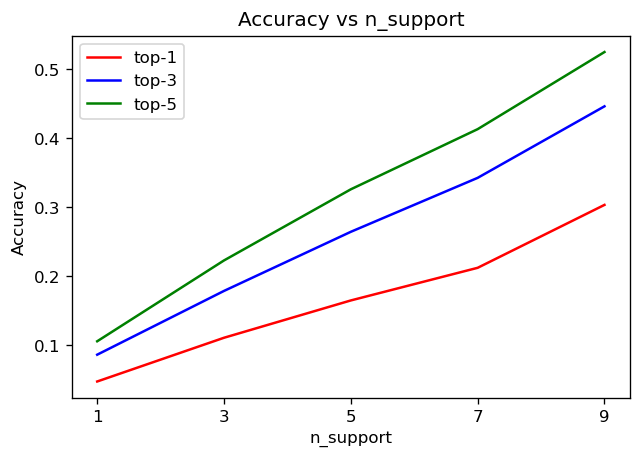

In [48]:
# plt.figure(figsize=(8,8))
plt.plot(r2_wild['support'], r2_wild['accuracy'], 'r',label='top-1')
plt.plot(r2_wild['support'], r2_wild['top-3'], 'b',label='top-3')
plt.plot(r2_wild['support'], r2_wild['top-5'], 'g',label='top-5')
plt.xticks(r2_wild['support'])
plt.legend()
plt.title('Accuracy vs n_support')
plt.xlabel('n_support')
plt.ylabel('Accuracy')

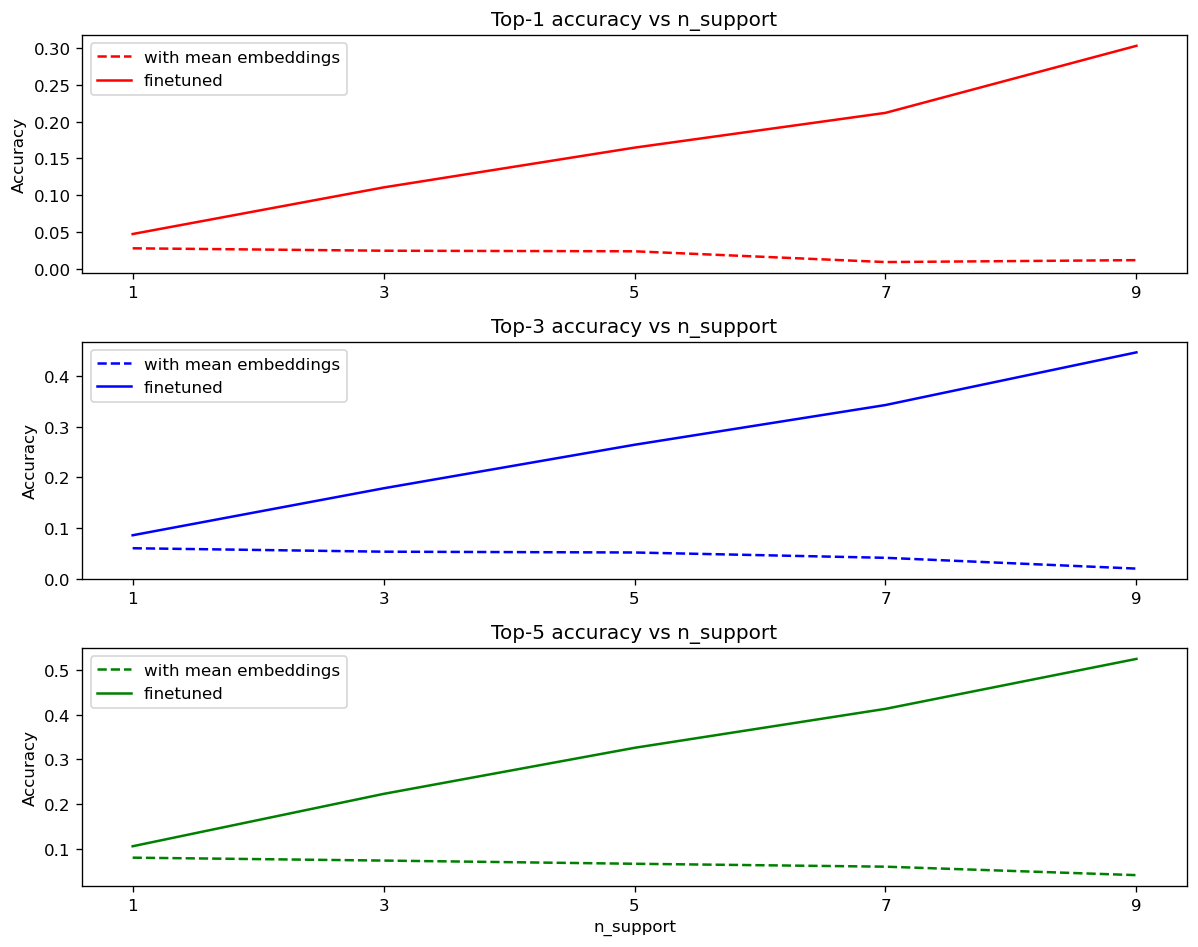

In [88]:
fig, axes = plt.subplots(nrows=3, figsize=(10,8)) #figsize=(8,8)
axes[0].plot(r_wild['support'], r_wild['accuracy'], 'r--', label='with mean embeddings')
axes[0].plot(r2_wild['support'], r2_wild['accuracy'], 'r',label='finetuned')

axes[1].plot(r_wild['support'], r_wild['top-3'], 'b--', label='with mean embeddings')
axes[1].plot(r2_wild['support'], r2_wild['top-3'], 'b',label='finetuned')

axes[2].plot(r_wild['support'], r_wild['top-5'], 'g--', label='with mean embeddings')
axes[2].plot(r2_wild['support'], r2_wild['top-5'], 'g',label='finetuned')
axes[0].set_xticks(r2_wild['support'])
axes[1].set_xticks(r2_wild['support'])
axes[2].set_xticks(r2_wild['support'])

axes[0].legend()
axes[1].legend()
axes[2].legend()

axes[0].set_title('Top-1 accuracy vs n_support')
axes[2].set_xlabel('n_support')
axes[0].set_ylabel('Accuracy')
axes[1].set_title('Top-3 accuracy vs n_support')
axes[1].set_ylabel('Accuracy')
axes[2].set_title('Top-5 accuracy vs n_support')
axes[2].set_ylabel('Accuracy')
fig.tight_layout()

## Inception

In [20]:
data = pd.read_csv('few-shot-inception-results.csv')

In [21]:
zoo_results = data[(data['type']=='zoo') & (data['Augmentation'] != 'No')]

In [22]:
zoo_results_no_finetune = zoo_results[(zoo_results['finetune']=='No') & (zoo_results['support'] < 20)]
zoo_results_finetune = zoo_results[(zoo_results['finetune']=='Yes') & (zoo_results['support'] < 20)]

In [25]:
r_inc = zoo_results_no_finetune.sort_values(by='support')

In [26]:
r2_inc = zoo_results_finetune.sort_values(by='support')
r2_inc

,type,support,finetune,Augmentation,accuracy,top-3,top-5
11,zoo,1,Yes,NaN,0.4486,0.5854,0.6589
13,zoo,2,Yes,NaN,0.5757,0.7224,0.8057
15,zoo,3,Yes,NaN,0.8104,0.9232,0.9591
17,zoo,5,Yes,NaN,0.9178,0.9664,0.9763
19,zoo,7,Yes,NaN,0.9911,0.9949,0.9949
21,zoo,9,Yes,NaN,0.9883,0.9983,0.9928


Text(0, 0.5, 'Accuracy')

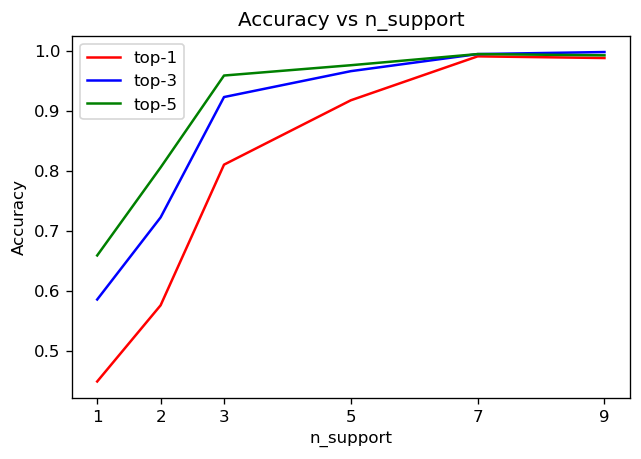

In [27]:
# plt.figure(figsize=(8,8))
plt.plot(r2_inc['support'], r2_inc['accuracy'], 'r',label='top-1')
plt.plot(r2_inc['support'], r2_inc['top-3'], 'b',label='top-3')
plt.plot(r2_inc['support'], r2_inc['top-5'], 'g',label='top-5')
plt.xticks(r2_inc['support'])
plt.legend()
plt.title('Accuracy vs n_support')
plt.xlabel('n_support')
plt.ylabel('Accuracy')

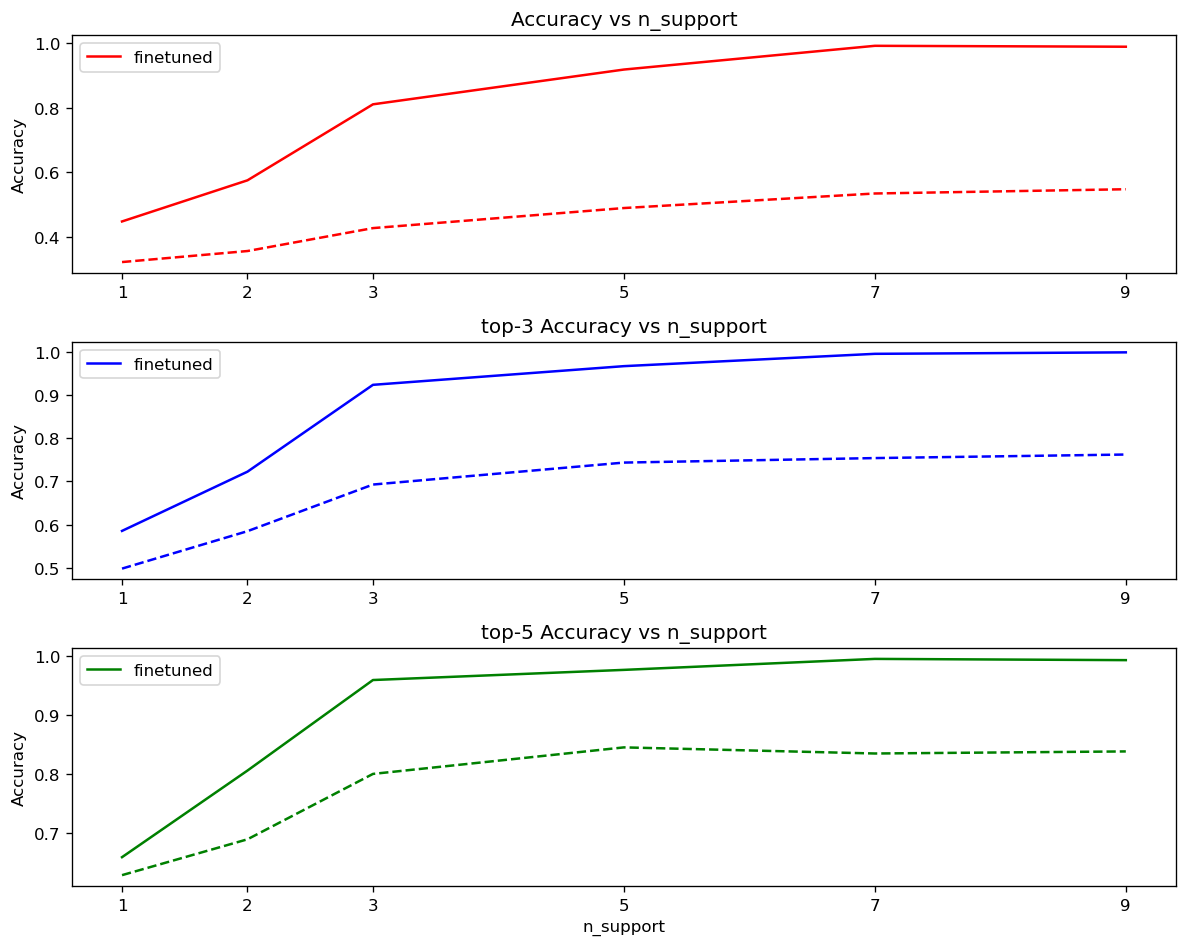

In [70]:
fig, axes = plt.subplots(nrows=3, figsize=(10,8))
axes[0].plot(r_inc['support'], r_inc['accuracy'], 'r--')
axes[0].plot(r2_inc['support'], r2_inc['accuracy'], 'r',label='finetuned')

axes[1].plot(r_inc['support'], r_inc['top-3'], 'b--')
axes[1].plot(r2_inc['support'], r2_inc['top-3'], 'b',label='finetuned')

axes[2].plot(r_inc['support'], r_inc['top-5'], 'g--')
axes[2].plot(r2_inc['support'], r2_inc['top-5'], 'g',label='finetuned')
axes[0].set_xticks(r2_inc['support'])
axes[1].set_xticks(r2_inc['support'])
axes[2].set_xticks(r2_inc['support'])

axes[0].legend()
axes[1].legend()
axes[2].legend()

axes[0].set_title('Accuracy vs n_support')
axes[2].set_xlabel('n_support')
axes[0].set_ylabel('Accuracy')
axes[1].set_title('top-3 Accuracy vs n_support')
axes[1].set_ylabel('Accuracy')
axes[2].set_title('top-5 Accuracy vs n_support')
axes[2].set_ylabel('Accuracy')
fig.tight_layout()

In [29]:
wild_results = data[(data['type']=='wild') & (data['Augmentation'] != 'No')]

In [30]:
wild_results_no_finetune = wild_results[(wild_results['finetune']=='No') & (wild_results['support'] < 20)]
wild_results_finetune = wild_results[(wild_results['finetune']=='Yes') & (wild_results['support'] < 20)]

In [31]:
r_wild_inc = wild_results_no_finetune.sort_values(by='support')

In [32]:
r_wild_inc

,type,support,finetune,Augmentation,accuracy,top-3,top-5
8,wild,1,No,NaN,0.019988,0.043860,0.057190
6,wild,3,No,NaN,0.021320,0.038704,0.061600
4,wild,5,No,NaN,0.016587,0.039099,0.053300
2,wild,7,No,NaN,0.010870,0.027174,0.043478
0,wild,9,No,NaN,0.008746,0.029154,0.034985


In [33]:
r2_wild_inc = wild_results_finetune.sort_values(by='support')
r2_wild_inc

,type,support,finetune,Augmentation,accuracy,top-3,top-5
9,wild,1,Yes,NaN,0.04775,0.08773,0.1116
7,wild,3,Yes,NaN,0.08926,0.16980,0.2196
5,wild,5,Yes,NaN,0.16470,0.25470,0.3211
3,wild,7,Yes,NaN,0.25180,0.40760,0.4783
1,wild,9,Yes,NaN,0.27990,0.46040,0.5102


Text(0, 0.5, 'Accuracy')

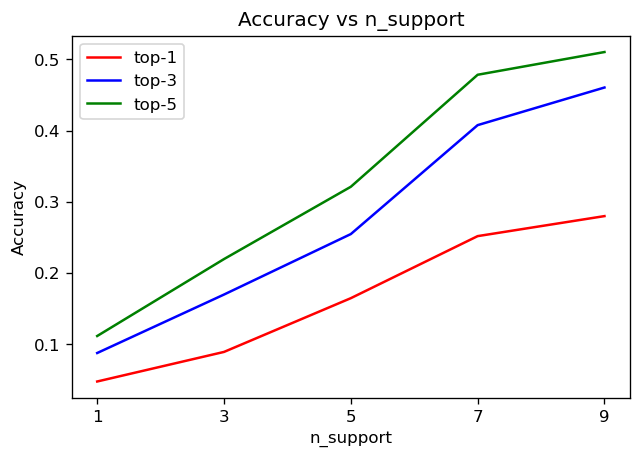

In [34]:
# plt.figure(figsize=(8,8))
plt.plot(r2_wild_inc['support'], r2_wild_inc['accuracy'], 'r',label='top-1')
plt.plot(r2_wild_inc['support'], r2_wild_inc['top-3'], 'b',label='top-3')
plt.plot(r2_wild_inc['support'], r2_wild_inc['top-5'], 'g',label='top-5')
plt.xticks(r2_wild_inc['support'])
plt.legend()
plt.title('Accuracy vs n_support')
plt.xlabel('n_support')
plt.ylabel('Accuracy')

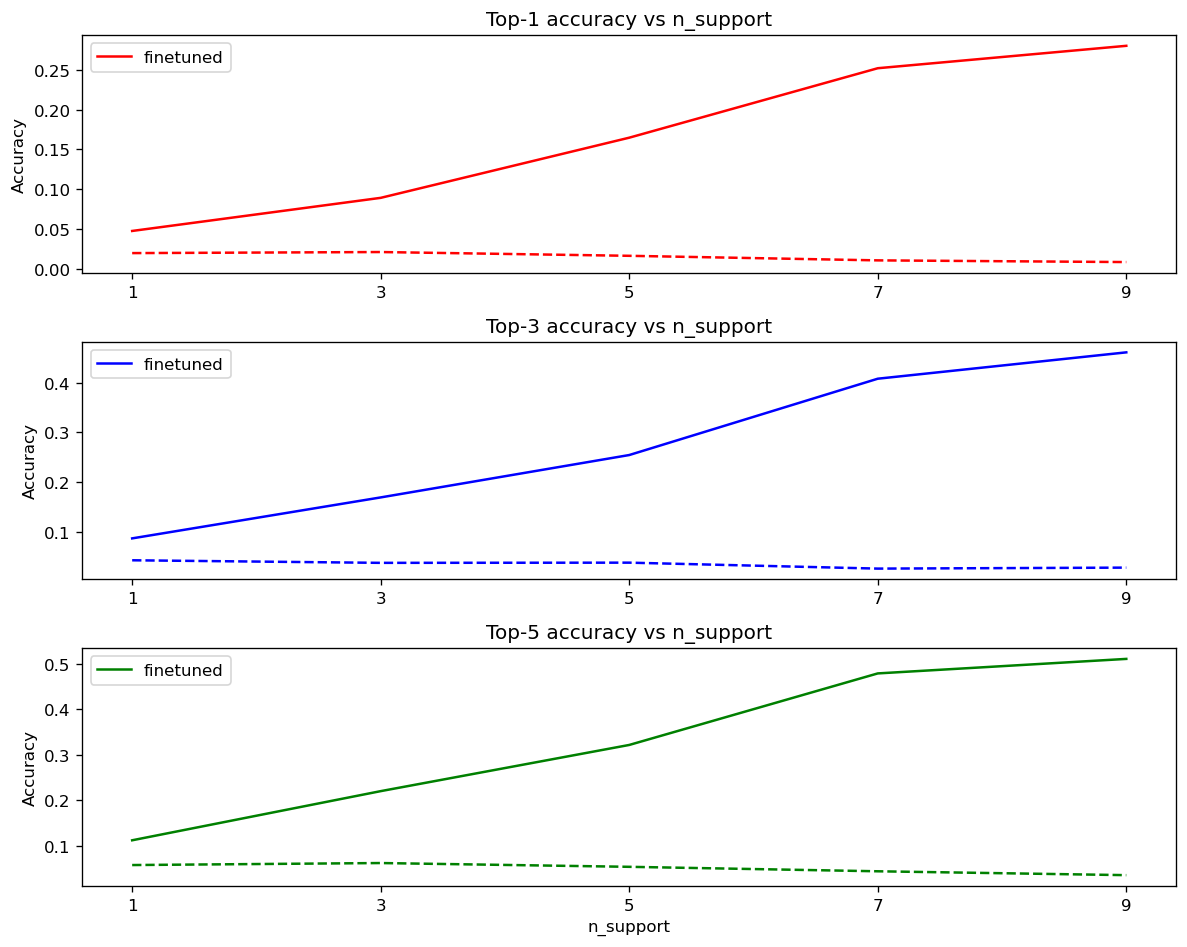

In [86]:
fig, axes = plt.subplots(nrows=3, figsize=(10,8)) #figsize=(8,8)
axes[0].plot(r_wild_inc['support'], r_wild_inc['accuracy'], 'r--')
axes[0].plot(r2_wild_inc['support'], r2_wild_inc['accuracy'], 'r',label='finetuned')

axes[1].plot(r_wild_inc['support'], r_wild_inc['top-3'], 'b--')
axes[1].plot(r2_wild_inc['support'], r2_wild_inc['top-3'], 'b',label='finetuned')

axes[2].plot(r_wild_inc['support'], r_wild_inc['top-5'], 'g--')
axes[2].plot(r2_wild_inc['support'], r2_wild_inc['top-5'], 'g',label='finetuned')
axes[0].set_xticks(r2_wild_inc['support'])
axes[1].set_xticks(r2_wild_inc['support'])
axes[2].set_xticks(r2_wild_inc['support'])

axes[0].legend()
axes[1].legend()
axes[2].legend()

axes[0].set_title('Top-1 accuracy vs n_support')
axes[2].set_xlabel('n_support')
axes[0].set_ylabel('Accuracy')
axes[1].set_title('Top-3 accuracy vs n_support')
axes[1].set_ylabel('Accuracy')
axes[2].set_title('Top-5 accuracy vs n_support')
axes[2].set_ylabel('Accuracy')
fig.tight_layout()

### Resnet vs Inception

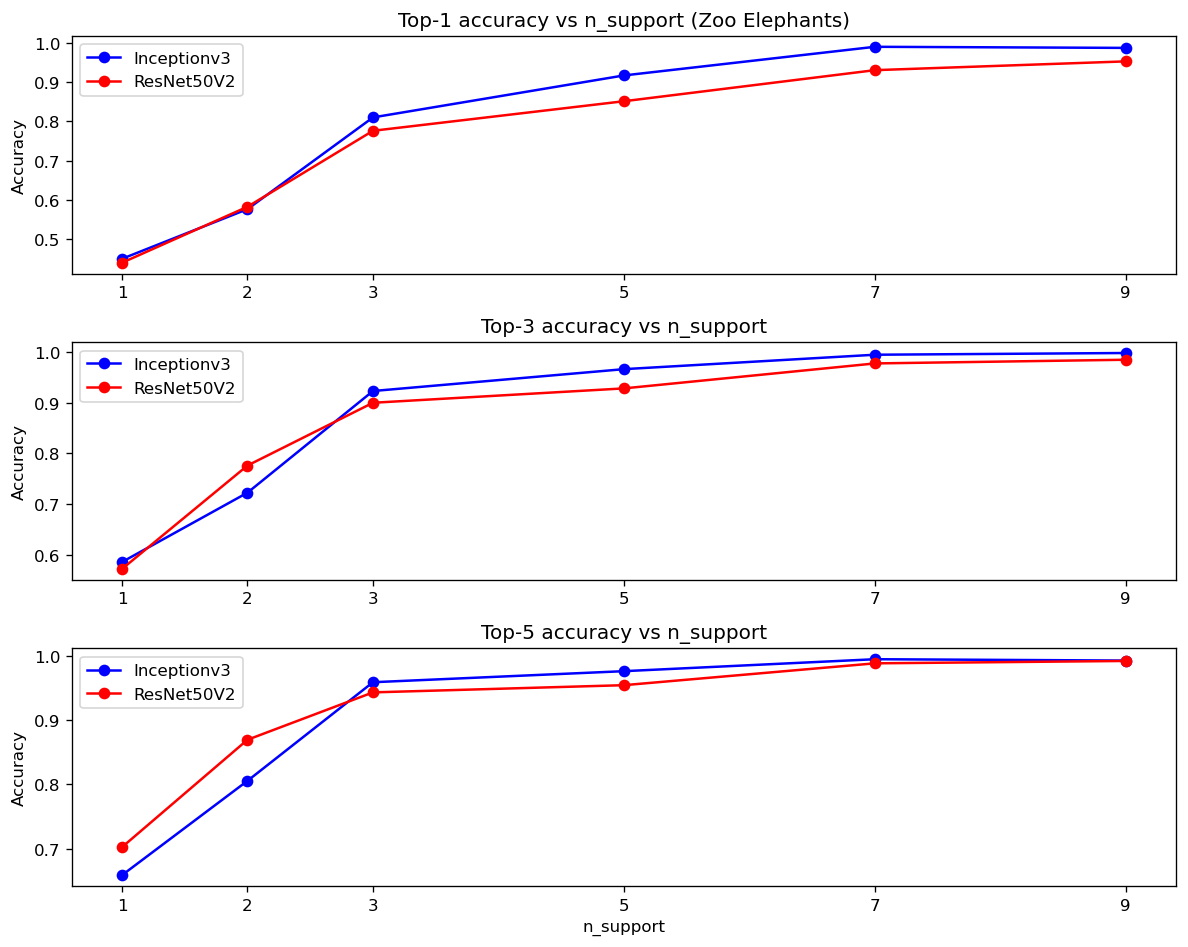

In [172]:
fig, axes = plt.subplots(nrows=3, figsize=(10,8))
axes[0].plot(r2_inc['support'], r2_inc['accuracy'], 'b-o', label='Inceptionv3')
axes[0].plot(r2['support'], r2['accuracy'], 'r-o',label='ResNet50V2')

axes[1].plot(r2_inc['support'], r2_inc['top-3'], 'b-o', label='Inceptionv3')
axes[1].plot(r2['support'], r2['top-3'], 'r-o',label='ResNet50V2')

axes[2].plot(r2_inc['support'], r2_inc['top-5'], 'b-o', label='Inceptionv3')
axes[2].plot(r2['support'], r2['top-5'], 'r-o', label='ResNet50V2')
axes[0].set_xticks(r2_inc['support'])
axes[1].set_xticks(r2_inc['support'])
axes[2].set_xticks(r2_inc['support'])

axes[0].legend()
axes[1].legend()
axes[2].legend()

axes[0].set_title('Top-1 accuracy vs n_support (Zoo Elephants)')
axes[2].set_xlabel('n_support')
axes[0].set_ylabel('Accuracy')
axes[1].set_title('Top-3 accuracy vs n_support')
axes[1].set_ylabel('Accuracy')
axes[2].set_title('Top-5 accuracy vs n_support')
axes[2].set_ylabel('Accuracy')
fig.tight_layout()

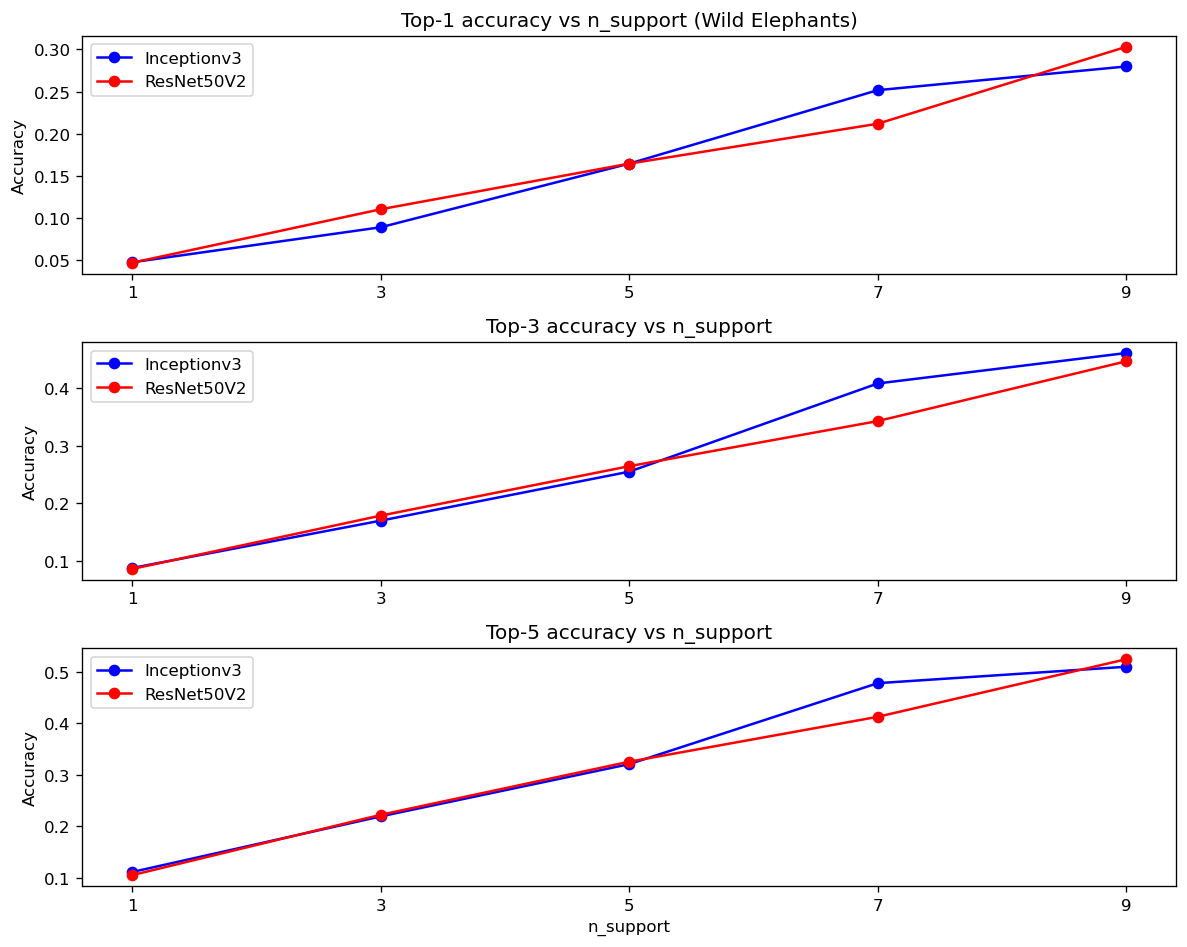

In [173]:
fig, axes = plt.subplots(nrows=3, figsize=(10,8))
axes[0].plot(r2_wild_inc['support'], r2_wild_inc['accuracy'], 'b-o', label='Inceptionv3')
axes[0].plot(r2_wild['support'], r2_wild['accuracy'], 'r-o',label='ResNet50V2')

axes[1].plot(r2_wild_inc['support'], r2_wild_inc['top-3'], 'b-o', label='Inceptionv3')
axes[1].plot(r2_wild['support'], r2_wild['top-3'], 'r-o',label='ResNet50V2')

axes[2].plot(r2_wild_inc['support'], r2_wild_inc['top-5'], 'b-o', label='Inceptionv3')
axes[2].plot(r2_wild['support'], r2_wild['top-5'], 'r-o', label='ResNet50V2')
axes[0].set_xticks(r2_wild_inc['support'])
axes[1].set_xticks(r2_wild_inc['support'])
axes[2].set_xticks(r2_wild_inc['support'])

axes[0].legend()
axes[1].legend()
axes[2].legend()

axes[0].set_title('Top-1 accuracy vs n_support (Wild Elephants)')
axes[2].set_xlabel('n_support')
axes[0].set_ylabel('Accuracy')
axes[1].set_title('Top-3 accuracy vs n_support')
axes[1].set_ylabel('Accuracy')
axes[2].set_title('Top-5 accuracy vs n_support')
axes[2].set_ylabel('Accuracy')
fig.tight_layout()

In [105]:
r

,type,support,finetune,Augmentation,accuracy,top-3,top-5,epochs,lr
9,zoo,1,No,NaN,0.474310,0.691750,0.786738,NaN,NaN
11,zoo,2,No,NaN,0.461678,0.727217,0.856970,NaN,NaN
3,zoo,3,No,NaN,0.554870,0.809750,0.896950,NaN,NaN
0,zoo,5,No,NaN,0.638200,0.807000,0.882900,NaN,NaN
5,zoo,7,No,NaN,0.685000,0.886875,0.949375,NaN,NaN
7,zoo,9,No,NaN,0.680104,0.896600,0.946684,NaN,NaN


In [106]:
r2

,type,support,finetune,Augmentation,accuracy,top-3,top-5,epochs,lr
10,zoo,1,Yes,NaN,0.4385,0.5717,0.7025,NaN,NaN
12,zoo,2,Yes,NaN,0.5818,0.7760,0.8696,NaN,NaN
4,zoo,3,Yes,NaN,0.7762,0.9000,0.9433,NaN,NaN
2,zoo,5,Yes,NaN,0.8518,0.9284,0.9545,60.0,0.0001
6,zoo,7,Yes,NaN,0.9313,0.9777,0.9885,NaN,NaN
8,zoo,9,Yes,NaN,0.9538,0.9850,0.9922,NaN,NaN


In [108]:
r['support'].values

array([1, 2, 3, 5, 7, 9])

In [115]:
x = np.zeros((12, 3))
x[:6,0] = r['support'].values
x[:6, 1] = r['accuracy'].values
x[:6, 2] = np.zeros(6)
x[6:, 0] = r['support'].values
x[6:, 1] = r2['accuracy'].values
x[6:, 2] = np.ones(6)
x

array([[1.       , 0.47431  , 0.       ],
       [2.       , 0.4616777, 0.       ],
       [3.       , 0.55487  , 0.       ],
       [5.       , 0.6382   , 0.       ],
       [7.       , 0.685    , 0.       ],
       [9.       , 0.680104 , 0.       ],
       [1.       , 0.4385   , 1.       ],
       [2.       , 0.5818   , 1.       ],
       [3.       , 0.7762   , 1.       ],
       [5.       , 0.8518   , 1.       ],
       [7.       , 0.9313   , 1.       ],
       [9.       , 0.9538   , 1.       ]])

In [117]:
df = pd.DataFrame(x, columns=['n_support', 'accuracy', 'finetune'])
df

,n_support,accuracy,finetune
0,1.0,0.474310,0.0
1,2.0,0.461678,0.0
2,3.0,0.554870,0.0
3,5.0,0.638200,0.0
4,7.0,0.685000,0.0
5,9.0,0.680104,0.0
6,1.0,0.438500,1.0
7,2.0,0.581800,1.0
8,3.0,0.776200,1.0
9,5.0,0.851800,1.0


In [132]:
df.loc[df['finetune'] == 0, 'finetune'] = 'Mean Embedding'

In [134]:
df.loc[df['finetune'] == 1, 'finetune'] =  'Finetune'

In [135]:
df

,n_support,accuracy,finetune
0,1.0,0.474310,Mean Embedding
1,2.0,0.461678,Mean Embedding
2,3.0,0.554870,Mean Embedding
3,5.0,0.638200,Mean Embedding
4,7.0,0.685000,Mean Embedding
5,9.0,0.680104,Mean Embedding
6,1.0,0.438500,Finetune
7,2.0,0.581800,Finetune
8,3.0,0.776200,Finetune
9,5.0,0.851800,Finetune


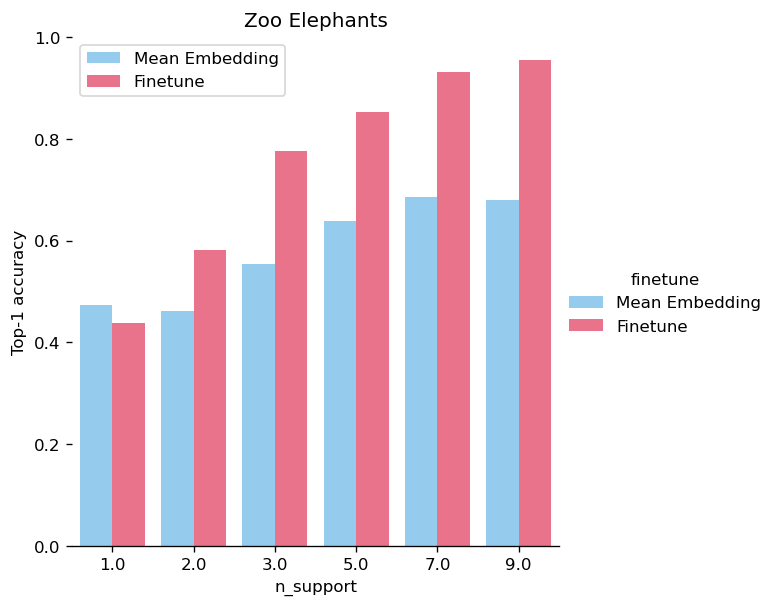

In [181]:
g = sns.catplot(
    data=df, kind="bar",
    x="n_support", y="accuracy", hue="finetune",
    ci="sd", alpha=1, height=5, palette = {'Mean Embedding': '#87cefa', 'Finetune': '#fb607f'}
).set(title='Zoo Elephants')
g.despine(left=True)
g.set_axis_labels("n_support", "Top-1 accuracy")
plt.legend(loc='upper left')

Text(0, 0.5, 'Accuracy')

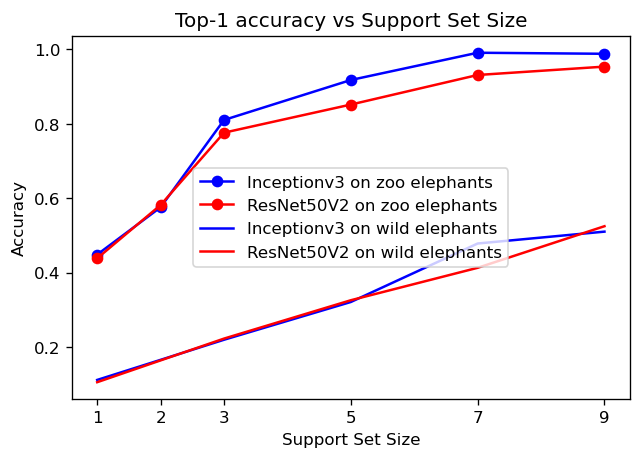

In [201]:
plt.figure(figsize=(6,4))
plt.plot(r2_inc['support'], r2_inc['accuracy'], 'b-o', label='Inceptionv3 on zoo elephants')
plt.plot(r2['support'], r2['accuracy'], 'r-o',label='ResNet50V2 on zoo elephants')
plt.plot(r2_wild_inc['support'], r2_wild_inc['top-5'], 'b', label='Inceptionv3 on wild elephants')
plt.plot(r2_wild['support'], r2_wild['top-5'], 'r',label='ResNet50V2 on wild elephants')
plt.legend()

plt.xticks(r2['support'])
plt.title('Top-1 accuracy vs Support Set Size')
plt.xlabel('Support Set Size')
plt.ylabel('Accuracy')